In [1]:
import pandas as pd
from sklearn import mixture
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
from ast import literal_eval
from scipy import optimize, stats, special
import seaborn as sns
import math
import xlsxwriter
from pylab import *
from scipy.optimize import curve_fit
import statistics
from sklearn import metrics

In [2]:
# read in the entire dataset
master = pd.read_excel('..\Data Cleanup\cleaned_data.xlsx', sheet_name = 'master')

master = master[(master['EffMeas'] == 'LR') & (master['TotalApp'] == 1)]

[1.594306   2.47834606 0.10212956 6.96837106 1.21996143 0.17039409]
1.0
871


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


,params
mu1,1.594306
sigma1,2.478346
mu2,6.968371
sigma2,1.219961
a,0.000000
b,9.300000


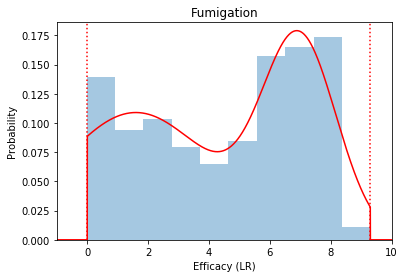

In [3]:
data = master[(master['AppMethod'] == 'fumigation') & (master['IndoorCarpet'] == 0) & (master['IndoorNonCarpet'] == 0) & 
              (master['IndoorCeilings'] == 0) & (master['HVAC'] == 0) & (master['IndoorMisc'] == 0) & (master['Roofing'] == 0) & 
              (master['UndergroundCarpet'] == 0) & (master['UndergroundNonCarpet'] == 0) & (master['UndergroundCeilings'] == 0)]

def truncated_gaussian_lower(x,mu,sigma,A):
    return A*np.exp((-(x-mu)**2)/(2*sigma**2))
def truncated_gaussian_upper(x,mu,sigma,A):
    return A * np.exp((-(x-mu)**2)/(2*sigma**2))
def mix_model(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return truncated_gaussian_lower(x,mu1,sigma1,A1) + truncated_gaussian_upper(x,mu2,sigma2,A2)

kde = stats.gaussian_kde(data.Eff.dropna())

maxEff = data.Eff.max()

expected = (1, 2, 160, 7, 1, 160)
params, cov = optimize.curve_fit(f=mix_model, xdata=data.Eff.dropna(), ydata=kde.pdf(data.Eff.dropna()), p0=expected)
print(params)

x = np.arange(-5, 15, 0.001)

a1 = (0 - params[0]) / params[1]
b1 = (maxEff - params[0]) / params[1]

a2 = (0 - params[3]) / params[4]
b2 = (maxEff - params[3]) / params[4]

y4 = stats.truncnorm.pdf(x, a1, b1, loc=params[0], scale=params[1]) + stats.truncnorm.pdf(x, a2, b2, loc=params[3], scale=params[4])
y5 = (stats.truncnorm.pdf(x, a1, b1, loc=params[0], scale=params[1]) + stats.truncnorm.pdf(x, a2, b2, loc=params[3], scale=params[4])) / metrics.auc(x, y4)

print(metrics.auc(x, y5))
print(len(data))
fig, ax = plt.subplots()
sns.distplot(data.Eff.dropna(), norm_hist=True, kde_kws={"linestyle":""})
ax.axvline(0, linestyle=":", color="red")
ax.axvline(maxEff, linestyle=":", color="red")
plt.plot(x, y5, color='red')

plt.xlim(-1, 10)
ax.set(xlabel='Efficacy (LR)', ylabel='Probability', title='Fumigation')

dfParams = pd.DataFrame(data={'params':params},index=mix_model.__code__.co_varnames[1:])
dfParams = dfParams.drop(index='A1')
dfParams = dfParams.drop(index='A2')
dfParams.loc['a'] = [0]
dfParams.loc['b'] = [maxEff]
dfParams

[0.7339715  1.13428041 0.15788899 5.71496695 1.99836281 0.12307937]
664
1.0


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


,params
mu1,0.733971
sigma1,1.134280
mu2,5.714967
sigma2,1.998363
a,0.000000
b,9.300000


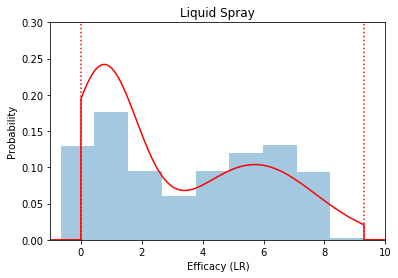

In [4]:
data = master[(master['AppMethod'] == 'liquid spray') & (master['Roofing'] == 0)]

def truncated_gaussian_lower(x,mu,sigma,A):
    return A*np.exp((-(x-mu)**2)/(2*sigma**2))
def truncated_gaussian_upper(x,mu,sigma,A):
    return A * np.exp((-(x-mu)**2)/(2*sigma**2))
def mix_model(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return truncated_gaussian_lower(x,mu1,sigma1,A1) + truncated_gaussian_upper(x,mu2,sigma2,A2)

kde = stats.gaussian_kde(data.Eff.dropna())

maxEff = data.Eff.max()

expected = (1, 2, 160, 7, 1, 160)
params, cov = optimize.curve_fit(f=mix_model, xdata=data.Eff.dropna(), ydata=kde.pdf(data.Eff.dropna()), p0=expected)
print(params)
print(len(data))
x = np.arange(-5, 15, 0.001)

a1 = (0 - params[0]) / params[1]
b1 = (maxEff - params[0]) / params[1]

a2 = (0 - params[3]) / params[4]
b2 = (maxEff - params[3]) / params[4]

y4 = stats.truncnorm.pdf(x, a1, b1, loc=params[0], scale=params[1]) + stats.truncnorm.pdf(x, a2, b2, loc=params[3], scale=params[4])
y5 = (stats.truncnorm.pdf(x, a1, b1, loc=params[0], scale=params[1]) + stats.truncnorm.pdf(x, a2, b2, loc=params[3], scale=params[4])) / metrics.auc(x, y4)

print(metrics.auc(x, y5))

fig, ax = plt.subplots()
sns.distplot(data.Eff.dropna(), norm_hist=True, kde_kws={"linestyle":""})
ax.axvline(0, linestyle=":", color="red")
ax.axvline(maxEff, linestyle=":", color="red")
plt.plot(x, y5, color='red')

plt.ylim(0, 0.3)
plt.xlim(-1, 10)
ax.set(xlabel='Efficacy (LR)', ylabel='Probability', title='Liquid Spray')

dfParams = pd.DataFrame(data={'params':params},index=mix_model.__code__.co_varnames[1:])
dfParams = dfParams.drop(index='A1')
dfParams = dfParams.drop(index='A2')
dfParams.loc['a'] = [0]
dfParams.loc['b'] = [maxEff]
dfParams

[1.3055984  2.35170782 0.09127154 6.51822608 1.27035745 0.18613836]
1.0000000000000002
548


C:\Users\PERAZA\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


,params
mu1,1.305598
sigma1,2.351708
mu2,6.518226
sigma2,1.270357
a,0.000000
b,8.100000


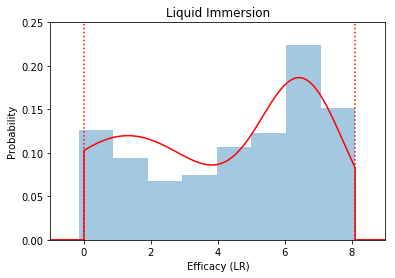

In [5]:
data = master[(master['AppMethod'] == 'liquid immersion') & (master['IndoorCarpet'] == 0) & (master['IndoorCeilings'] == 0) & 
              (master['IndoorMisc'] == 0) & (master['OutdoorMisc'] == 0) & (master['UndergroundCarpet'] == 0) & 
              (master['UndergroundCeilings'] == 0)]

def truncated_gaussian_lower(x,mu,sigma,A):
    return A*np.exp((-(x-mu)**2)/(2*sigma**2))
def truncated_gaussian_upper(x,mu,sigma,A):
    return A * np.exp((-(x-mu)**2)/(2*sigma**2))
def mix_model(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return truncated_gaussian_lower(x,mu1,sigma1,A1) + truncated_gaussian_upper(x,mu2,sigma2,A2)

kde = stats.gaussian_kde(data.Eff.dropna())

maxEff = data.Eff.max()

expected = (1, 2, 160, 7, 1, 160)
params, cov = optimize.curve_fit(f=mix_model, xdata=data.Eff.dropna(), ydata=kde.pdf(data.Eff.dropna()), p0=expected)
print(params)

x = np.arange(-5, 15, 0.001)

a1 = (0 - params[0]) / params[1]
b1 = (maxEff - params[0]) / params[1]

a2 = (0 - params[3]) / params[4]
b2 = (maxEff - params[3]) / params[4]

y4 = stats.truncnorm.pdf(x, a1, b1, loc=params[0], scale=params[1]) + stats.truncnorm.pdf(x, a2, b2, loc=params[3], scale=params[4])
y5 = (stats.truncnorm.pdf(x, a1, b1, loc=params[0], scale=params[1]) + stats.truncnorm.pdf(x, a2, b2, loc=params[3], scale=params[4])) / metrics.auc(x, y4)

print(metrics.auc(x, y5))
print(len(data))
fig, ax = plt.subplots()
sns.distplot(data.Eff.dropna(), norm_hist=True, kde_kws={"linestyle":""})
ax.axvline(0, linestyle=":", color="red")
ax.axvline(maxEff, linestyle=":", color="red")
plt.plot(x, y5, color='red')

plt.ylim(0, 0.25)
plt.xlim(-1, 9)
ax.set(xlabel='Efficacy (LR)', ylabel='Probability', title='Liquid Immersion')

dfParams = pd.DataFrame(data={'params':params},index=mix_model.__code__.co_varnames[1:])
dfParams = dfParams.drop(index='A1')
dfParams = dfParams.drop(index='A2')
dfParams.loc['a'] = [0]
dfParams.loc['b'] = [maxEff]
dfParams